In [12]:
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
with open("../data/all-schools-info.json") as fp:
    data = json.load(fp)
    fp.close()

In [3]:
affiliation = [[v["name"], v["GeneralInformation"]["Affiliated Schools"]] for k, v in data.items()]

In [32]:
g = nx.Graph()

In [27]:
links = []
for school in affiliation:
    if school[1] != 'Not Applicable':
        if type(school[1]) == str:
            links.append([school[0], school[1]])
        else:
            for affSchool in school[1]:
                links.append([school[0], affSchool])

In [33]:
g.add_edges_from(links)

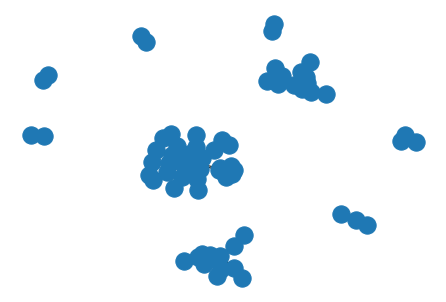

In [34]:
nx.draw(g)
plt.draw()

In [35]:
subgraphs = [sg for sg in nx.connected_components(g)]

In [40]:
cluster = {}
for i in range(0, len(subgraphs)):
    for sch in subgraphs[i]:
        cluster[sch] = i + 1

In [42]:
def assign_cluster(name, cluster_dict):
    if name in cluster_dict.keys():
        return cluster_dict[name]
    else: 
        return 0

In [51]:
nodes = [{'code': v['code'], 'name': v['name'], 'level': v['levels'], 'cluster': assign_cluster(v['name'], cluster)} for k, v in data.items()]

In [46]:
links = [{'source': link[0], 'target': link[1], 'cluster': cluster[link[0]]} for link in links]

In [52]:
network_data = {'nodes': nodes, 'links': links}

In [48]:
network_data['nodes'][:5]

[{'name': 'NATIONAL JUNIOR COLLEGE', 'level': 'SJT', 'cluster': 0},
 {'name': 'TEMASEK JUNIOR COLLEGE', 'level': 'SJT', 'cluster': 0},
 {'name': 'JURONG JUNIOR COLLEGE', 'level': 'J', 'cluster': 0},
 {'name': 'ANDERSON JUNIOR COLLEGE', 'level': 'J', 'cluster': 0},
 {'name': 'VICTORIA JUNIOR COLLEGE', 'level': 'J', 'cluster': 1}]

In [49]:
network_data['links'][:5]

[{'source': 'VICTORIA JUNIOR COLLEGE',
  'target': 'VICTORIA SCHOOL',
  'cluster': 1},
 {'source': 'CATHOLIC JUNIOR COLLEGE',
  'target': 'ASSUMPTION ENGLISH SCHOOL',
  'cluster': 2},
 {'source': 'CATHOLIC JUNIOR COLLEGE',
  'target': 'CHIJ SECONDARY (TOA PAYOH)',
  'cluster': 2},
 {'source': 'CATHOLIC JUNIOR COLLEGE',
  'target': 'CHIJ KATONG CONVENT',
  'cluster': 2},
 {'source': 'CATHOLIC JUNIOR COLLEGE',
  'target': 'MONTFORT SECONDARY SCHOOL',
  'cluster': 2}]

In [53]:
with open("../data/network_data.json", "w") as fp:
    json.dump(network_data, fp)